# TASK 2.1 - CLUSTERING 

In [71]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 

In [72]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [73]:
df = pd.read_csv(r"seismic_clust.csv", skipinitialspace=True)

In [74]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,...,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy,genergy_S,gpuls_S,energy_S,gdenergy_S,gdpuls_S
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,...,9.627734,3.871201,3.218876,3.218876,0.000000,-0.344249,-1.651209,0.000000,-1.593212,-1.761844
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,...,9.596962,3.496508,3.295837,2.890372,7.601402,-0.364671,-1.950436,0.963185,-1.498307,-2.209817
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,...,8.993427,3.401197,2.772589,2.944439,0.000000,-0.765223,-2.026550,0.000000,-2.143552,-2.136087
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,...,10.268825,5.141664,4.304065,4.919981,8.006701,0.081228,-0.636629,1.014541,-0.255009,0.557908
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,...,9.444622,4.043051,3.526361,3.806662,0.000000,-0.465776,-1.513971,0.000000,-1.214037,-0.960295


In [75]:
df.shape

(2578, 25)

# CLUSTERING ANALYSIS

# K-MEANS

### (genergy, gdpuls, energy)

In [76]:
# Selezione attributi da utilizzare nel clustering

df_1 = pd.DataFrame(data = df, columns=['genergy_S', 'gdpuls_S', 'energy_S'])
df_1.head()

,genergy_S,gdpuls_S,energy_S
0,-0.344249,-1.761844,0.000000
1,-0.364671,-2.209817,0.963185
2,-0.765223,-2.136087,0.000000
3,0.081228,0.557908,1.014541
4,-0.465776,-0.960295,0.000000


In [77]:
# calcolo di SSE e Silhouette tra 2 e 51

sse_list = []
silhouette_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_1)
    sse_list.append( kmeans.inertia_ )
    silhouette_list.append(silhouette_score(df_1, kmeans.labels_))

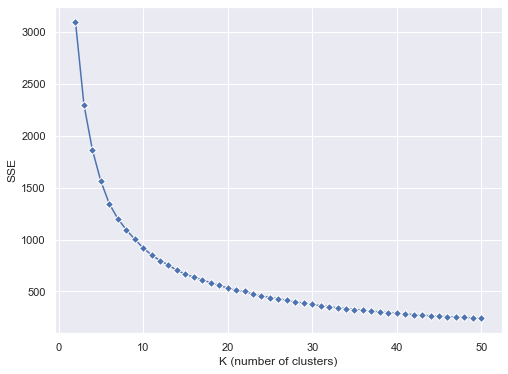

In [78]:
# visualizzazione grafica SSE

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(sse_list)+2), sse_list, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('SSE')
plt.show()

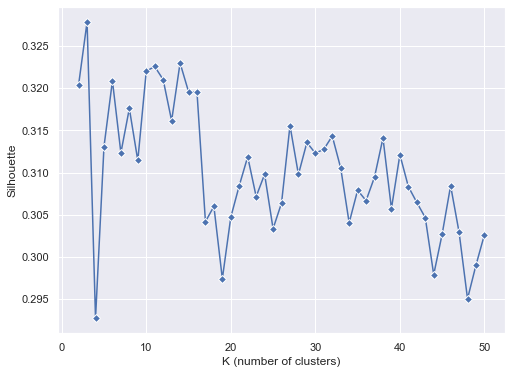

In [79]:
# visualizzazione grafica Silhouette

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(silhouette_list)+2), silhouette_list, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('Silhouette')
plt.show()

In [80]:
# calcolo di SSE e Silhouette tra 2 e 10
sse_list_10 = []
silhouette_list_10 = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_1)
    sse_list_10.append( kmeans.inertia_ )
    silhouette_list_10.append(silhouette_score(df_1, kmeans.labels_))

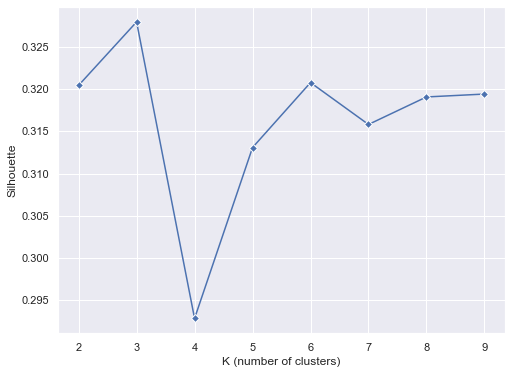

In [81]:
# visualizzazione grafica Silhouette tra 2 e 10

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(silhouette_list_10)+2), silhouette_list_10, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('Silhouette')
plt.show()

In [82]:
# inizializzazione k-means (con metodo k-means++)

kmeans = KMeans( n_clusters=3, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_1)

KMeans(max_iter=100, n_clusters=3)

In [83]:
# stampa dell'array con le assegnazioni record-cluster

kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [84]:
# generazione lista centroidi

centers = kmeans.cluster_centers_
centers

array([[ 0.02375941,  0.37987772,  0.4085656 ],
       [-0.75918531, -1.07520452,  0.26094433],
       [ 1.59370182, -0.01209984,  0.88303833]])

In [85]:
# creazione copia dataframe per visualizzare il pairplot

df_1Sc = df_1.copy(deep=True)
df_1Sc['kmeans.labels_'] = kmeans.labels_

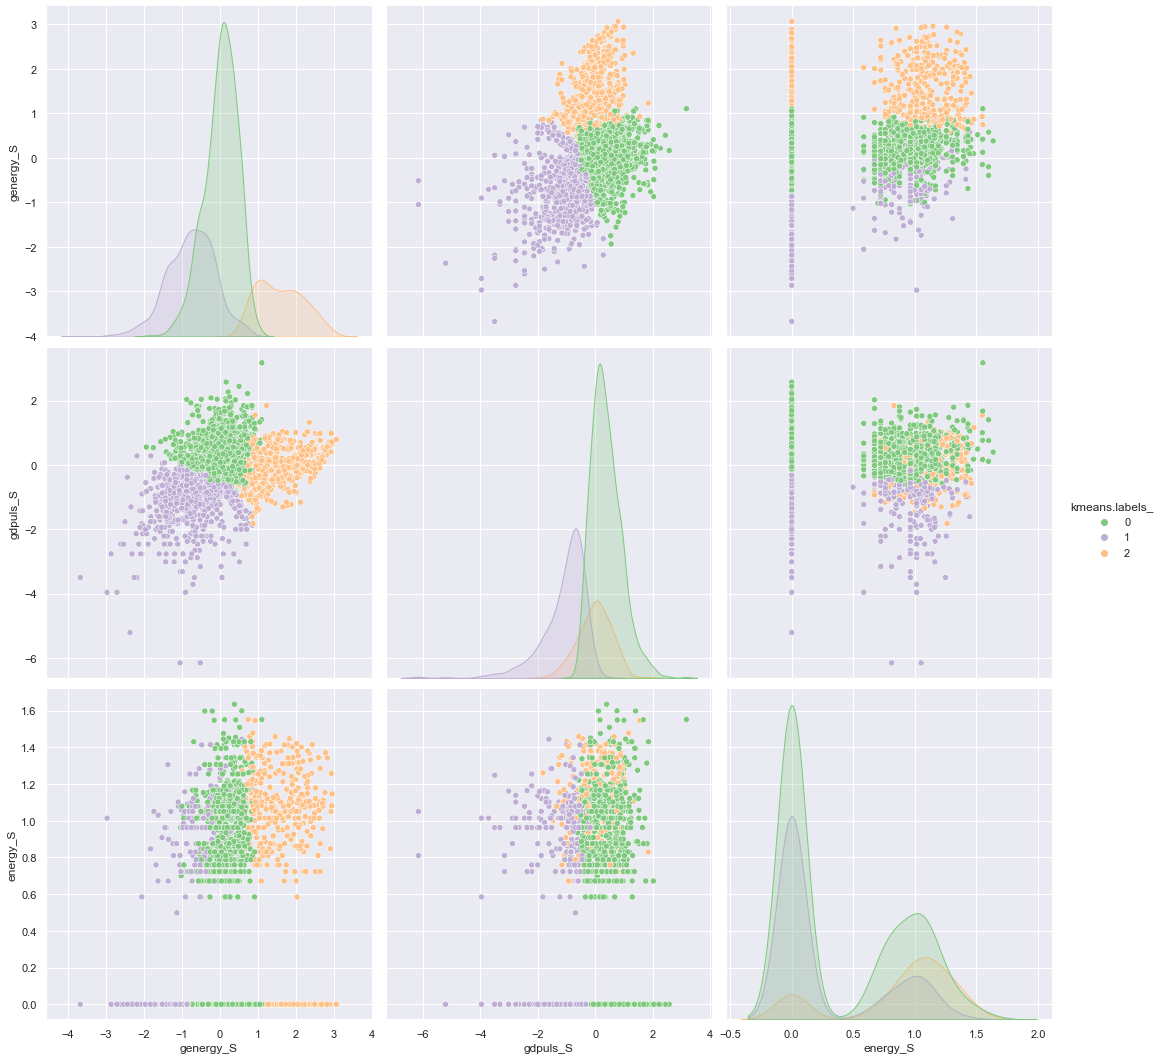

In [86]:
# visualizzazione pairplot con le possibili combinazioni tra attributi

sns.pairplot(df_1Sc, hue='kmeans.labels_', palette = "Accent", height=5)
plt.show()

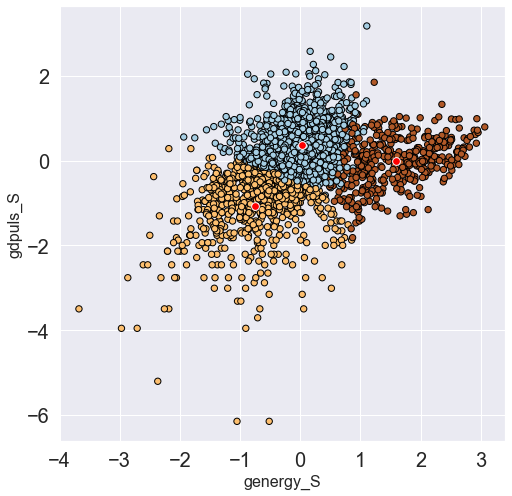

In [140]:
# visualizzazione grafica clustering scelto

plt.figure(figsize=(8, 8))
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= kmeans.labels_, cmap = 'Paired')
plt.scatter( centers[:,0], centers[:,1], c='red', marker='.', s=240, edgecolor='white')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('genergy_S', fontsize=16)
plt.ylabel('gdpuls_S', fontsize=16)

plt.show()

/Users/riccardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



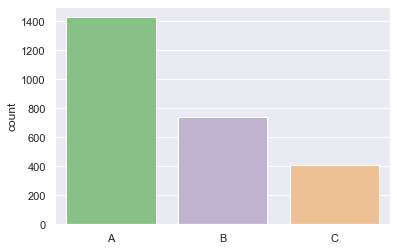

In [88]:
# visualizzazione count plot per ogni cluster

sns.countplot(kmeans.labels_, palette = 'Accent')
plt.xticks([0, 1, 2], ['A', 'B', 'C'])
plt.show()

In [89]:
# conteggio valori per ogni cluster

np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1428,  738,  412]))

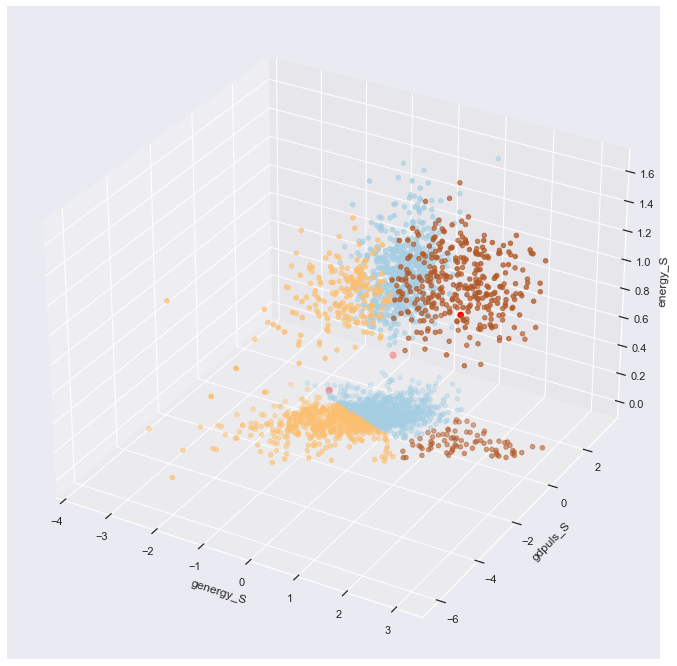

In [90]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = 'energy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap = 'Paired')
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='.', s=240, edgecolor='white' )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

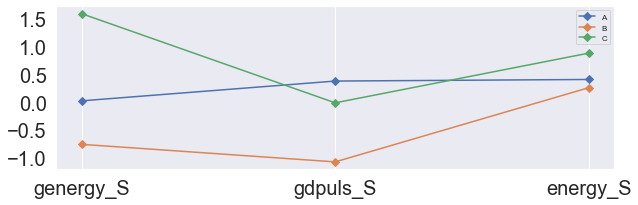

In [91]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='D', label=clust_name[i])

plt.xticks([0, 1, 2], df_1, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=8, loc='best')
plt.grid(axis='y')

In [92]:
# creazione copia dataframe per visualizzare correlazione con attributo class

df_1C = df_1.copy(deep=True)
df_1C['class'] = df['class']

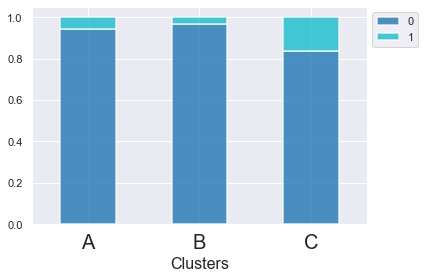

In [93]:
# visualizzazione grafica distribuzione di class nei clusters

df_1C['kmeans_labels'] = kmeans.labels_

bar_pl = df_1C['class'].groupby(df_1C['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

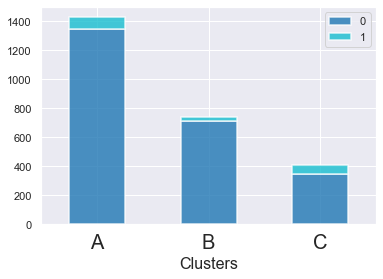

In [94]:
# visualizzazione grafica distribuzione di class nei clusters (normalize = False)

df_1C['kmeans_labels'] = kmeans.labels_

bar_pl = df_1C['class'].groupby(df_1C['kmeans_labels']).value_counts().unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [95]:
# Crosstab kmeans clusters vs class
pd.crosstab(kmeans.labels_ , df["class"],normalize=True)

class,0,1
row_0,,
0,0.523662,0.030256
1,0.276959,0.009310
2,0.133437,0.026377


In [96]:
# valori numerici SSE e Silhouette

print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(df_1, kmeans.labels_))

SSE 2298.4477487668705
Silhouette 0.3278649056584835


# DBSCAN

#### minsample (D * 2)

In [97]:
#### calcolo distanza dbscan con k = 6 (D = numero di attributi)

dist = pdist(df_1, 'euclidean')
dist = squareform(dist)

k=6
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

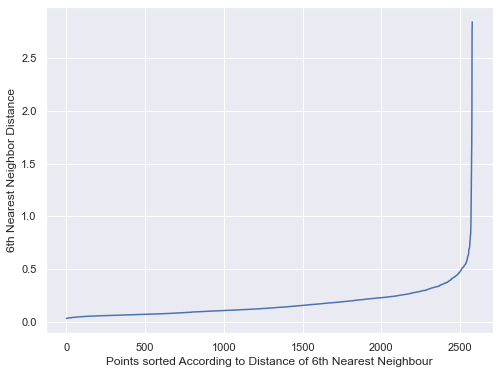

In [98]:
# visualizzazione grafica distanze

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.xlabel("Points sorted According to Distance of 6th Nearest Neighbour")
plt.ylabel(str(k)+'th Nearest Neighbor Distance')

plt.show()

In [99]:
# inizializzazione dbscan

dbscan = DBSCAN( eps=0.5, min_samples=6)
dbscan.fit(df_1)

DBSCAN(min_samples=6)

In [100]:
# stampa dell'array con le assegnazioni record-cluster

dbscan.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [101]:
# stampa lista cluster e lista elementi di ogni cluster

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([  21, 1452, 1105]))

In [102]:
df_1[:5]

,genergy_S,gdpuls_S,energy_S
0,-0.344249,-1.761844,0.000000
1,-0.364671,-2.209817,0.963185
2,-0.765223,-2.136087,0.000000
3,0.081228,0.557908,1.014541
4,-0.465776,-0.960295,0.000000


In [103]:
dbscan.labels_[:5]

array([0, 1, 0, 1, 0])

In [104]:
# creazione copia dataframe per visualizzare il pairplot

df_1Sc['dbscan.labels_'] = dbscan.labels_

/Users/riccardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



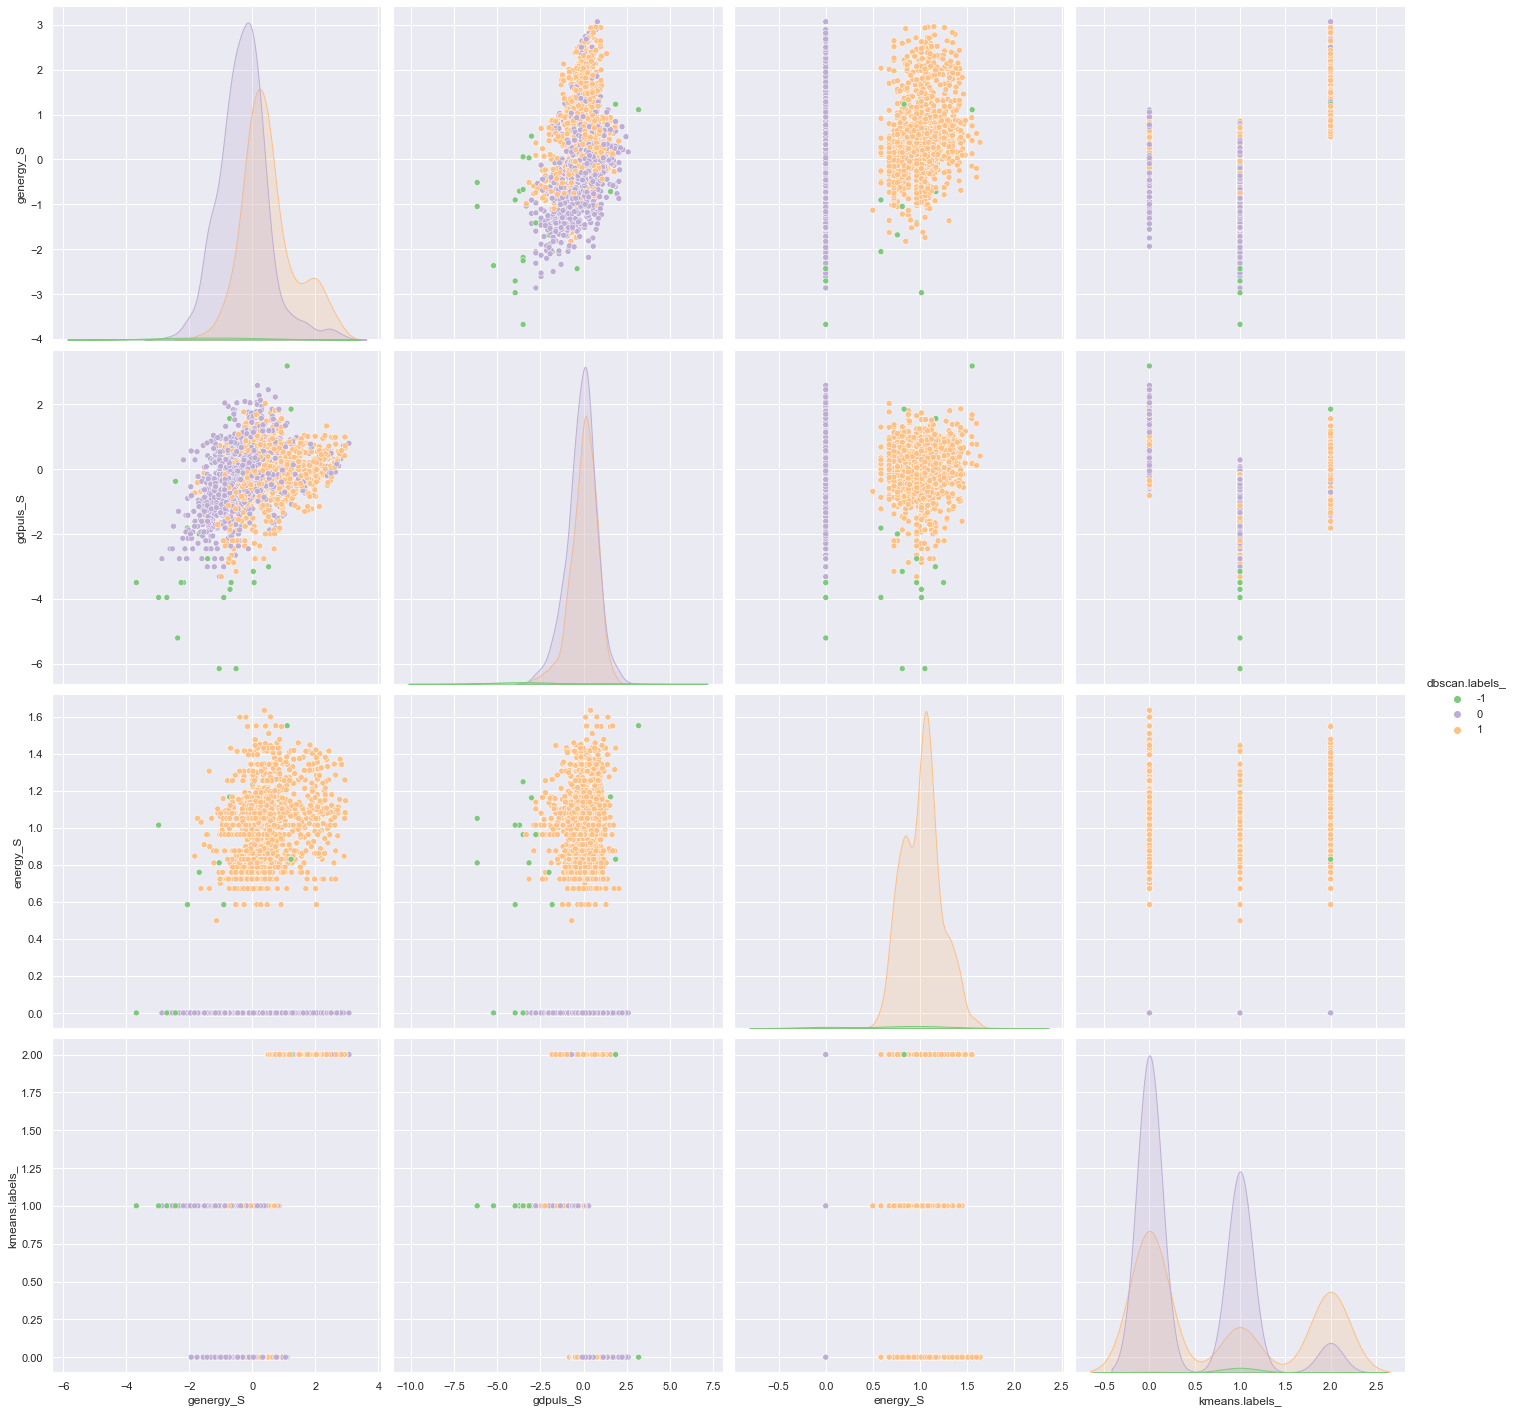

In [105]:
# visualizzazione pairplot con le possibili combinazioni tra attributi

sns.pairplot(df_1Sc, hue='dbscan.labels_', palette = "Accent", height=5)
plt.show()

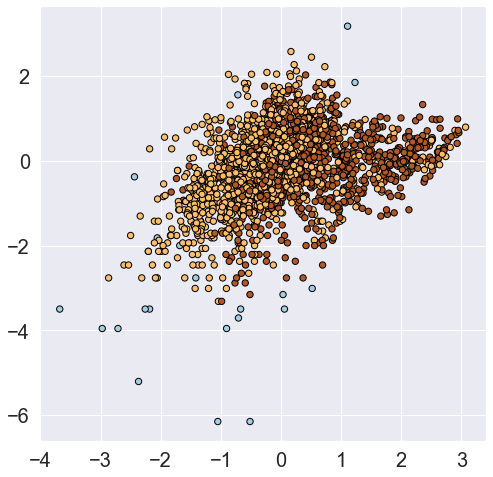

In [106]:
# visualizzazione grafica clustering scelto

plt.figure(figsize=(8, 8))

plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= dbscan.labels_, cmap="Paired")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

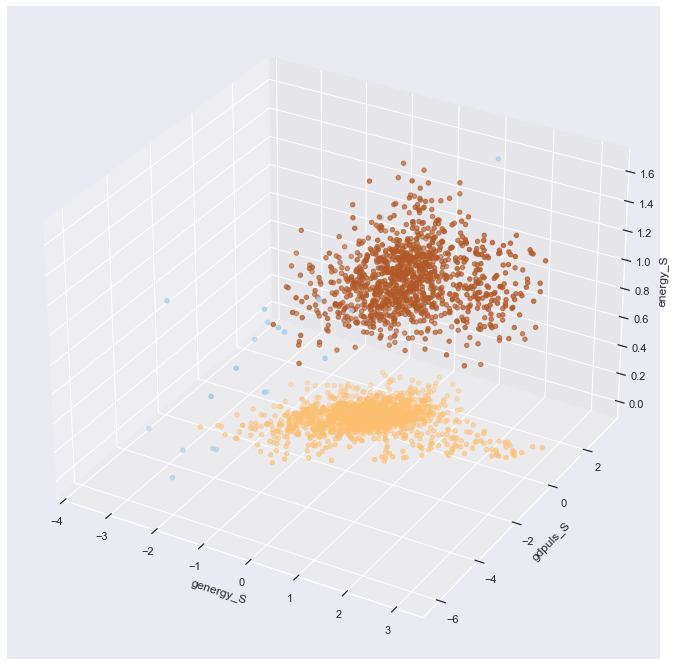

In [107]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = "energy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=dbscan.labels_, marker='o', cmap="Paired")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [108]:
# creazione copia dataframe 

df_1C = df_1.copy(deep=True)
df_1C['class'] = df['class']

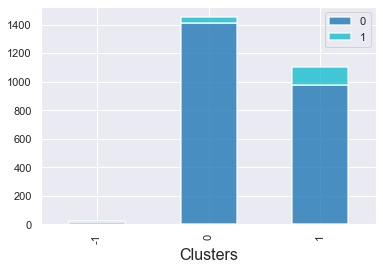

In [109]:
# visualizzazione grafica distribuzione di class nei clusters (normalize = False)

df_1Sc['dbscan.labels_'] = dbscan.labels_

bar_pl = df_1C['class'].groupby(df_1Sc['dbscan.labels_']).value_counts().unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')

#plt.xticks(range(0, len(clust_name)), fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

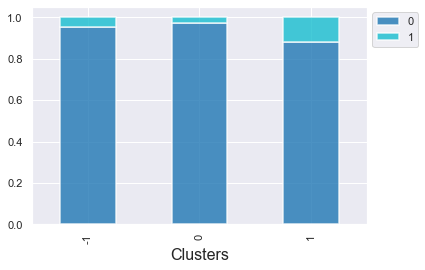

In [142]:
# visualizzazione grafica distribuzione di class nei clusters (normalize = True)

bar_pl = df_1C['class'].groupby(df_1Sc['dbscan.labels_']).value_counts(normalize = True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')

#plt.xticks(range(0, len(clust_name)), fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [110]:
df_1Sc.head()

,genergy_S,gdpuls_S,energy_S,kmeans.labels_,dbscan.labels_
0,-0.344249,-1.761844,0.000000,1,0
1,-0.364671,-2.209817,0.963185,1,1
2,-0.765223,-2.136087,0.000000,1,0
3,0.081228,0.557908,1.014541,0,1
4,-0.465776,-0.960295,0.000000,1,0


In [111]:
df_1Sc['class'] = df['class']

In [112]:
df_1Sc.head()

,genergy_S,gdpuls_S,energy_S,kmeans.labels_,dbscan.labels_,class
0,-0.344249,-1.761844,0.000000,1,0,0
1,-0.364671,-2.209817,0.963185,1,1,0
2,-0.765223,-2.136087,0.000000,1,0,0
3,0.081228,0.557908,1.014541,0,1,0
4,-0.465776,-0.960295,0.000000,1,0,0


In [113]:
df_1Sc[dbscan.labels_== -1].describe()

,genergy_S,gdpuls_S,energy_S,kmeans.labels_,dbscan.labels_,class
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000
mean,-1.208213,-2.719839,0.691253,0.952381,-1.0,0.047619
std,1.344714,2.442860,0.496341,0.384212,0.0,0.218218
min,-3.677606,-6.151341,0.000000,0.000000,-1.0,0.000000
25%,-2.257295,-3.956592,0.000000,1.000000,-1.0,0.000000
50%,-1.050173,-3.497754,0.810775,1.000000,-1.0,0.000000
75%,-0.514798,-1.999605,1.014541,1.000000,-1.0,0.000000
max,1.230394,3.176933,1.551620,2.000000,-1.0,1.000000


In [144]:
#Crosstab dbscan clusters vs class
pd.crosstab(dbscan.labels_, df["class"],normalize=True, rownames=['clusters'])

class,0,1
clusters,,
-1,0.007758,0.000388
0,0.547711,0.015516
1,0.378588,0.050039


#  HIERARCHICAL CLUSTERING

Text(0.5, 1.0, 'Single link')

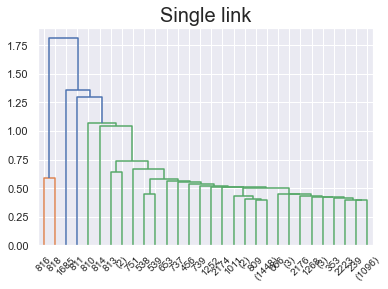

In [115]:
# Single
data_dist= pdist(df_1, metric='euclidean')
data_link_1 = linkage(data_dist, method='single')
res_1 = dendrogram(data_link_1, truncate_mode='lastp')
plt.title("Single link",fontsize = 20)

Text(0.5, 1.0, 'Complete link')

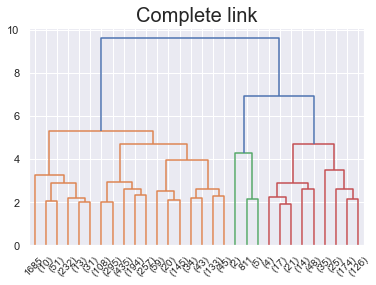

In [116]:
# Complete
data_dist = pdist(df_1, metric='euclidean')
data_link_2 = linkage(data_dist, method='complete')
res_2 = dendrogram(data_link_2, truncate_mode='lastp')
plt.title("Complete link",fontsize = 20)

Text(0.5, 1.0, 'Group Average')

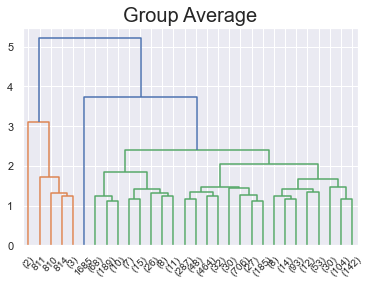

In [117]:
# Average
#data_dist = pdist(df_1, metric='euclidean')
data_link_3 = linkage(data_dist, method='average')
res_3 = dendrogram(data_link_3, truncate_mode='lastp')
plt.title("Group Average",fontsize = 20)

Text(0.5, 1.0, "Ward's method")

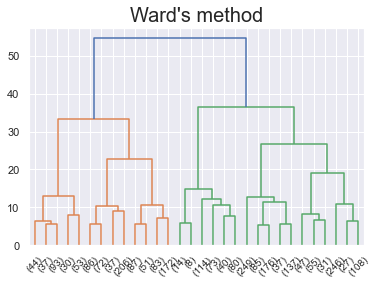

In [118]:
# ward
data_dist = pdist(df_1, metric='euclidean')
data_link_4 = linkage(data_dist, method='ward')
res_4 = dendrogram(data_link_4, truncate_mode='lastp')
plt.title("Ward's method",fontsize = 20)

In [119]:
results = []
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
for k in range(2, 11):
    for l in linkages:
        for metr in metrics:
            if l == 'ward' and metr != 'euclidean':
                continue
            res = AgglomerativeClustering(n_clusters=k, affinity=metr, linkage=l).fit(df_1)
            results.append({'res': res, 'k': k,'silu': silhouette_score(df_1, res.labels_, metric = metr), 'link': l, 'metric': metr})
    print("end k = ", k)

end k =  2
end k =  3
end k =  4
end k =  5
end k =  6
end k =  7
end k =  8
end k =  9
end k =  10


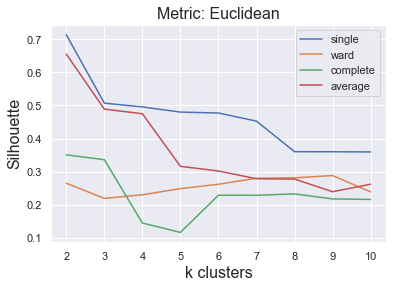

In [120]:
# silhouette score vs k number of cluster per capire dove tagliare il dendrogram, dove decresce in maniera 
# significativa si taglia il dendrogram, ottenendo così il numero di clusters per inizializzatre l'algoritmo

x = range(2, 11)
fig, ax = plt.subplots()

y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'euclidean']
y2 = [a for a in results if a['link'] == 'ward' and a['metric'] == 'euclidean']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'euclidean']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'euclidean']

ys = [y1, y2, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Euclidean',fontsize=16)

ax.legend()

plt.ylabel('Silhouette', fontsize=16)
plt.xlabel('k clusters', fontsize=16)
plt.show()

In [121]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hier.fit(df_1)

AgglomerativeClustering()

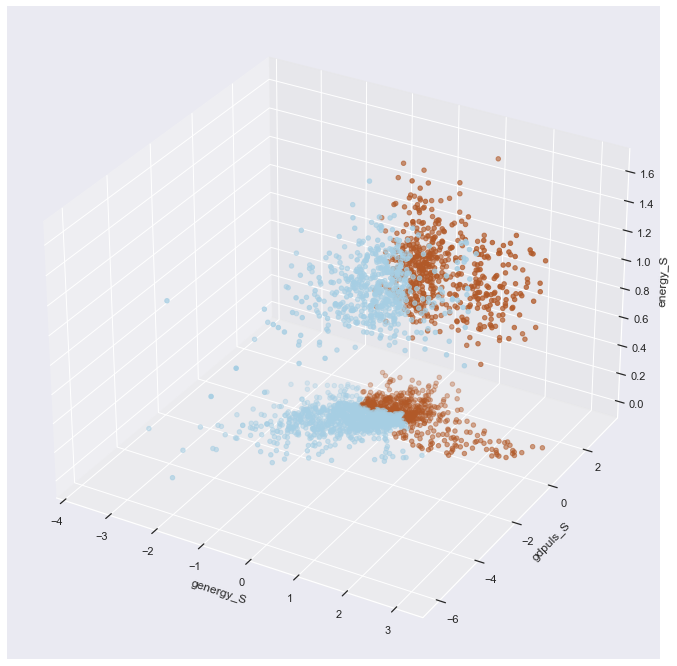

In [122]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = "energy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=hier.labels_, marker='o', cmap="Paired")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

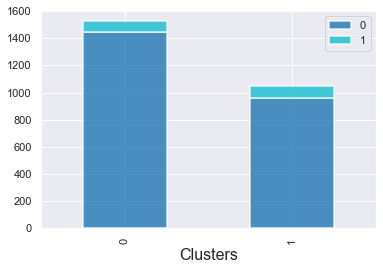

In [123]:
# visualizzazione grafica distribuzione class nei clusters (normalize = False)

df_1Sc['hier.labels_'] = hier.labels_

bar_pl_1 = df_1C['class'].groupby(df_1Sc['hier.labels_']).value_counts(normalize=False).unstack(1)
bar_pl_1.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')
bar_pl_2 = df_1C['class'].groupby(df_1Sc['hier.labels_']).value_counts(normalize=True).unstack(1)

#plt.xticks(range(0, len(clust_name)), fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

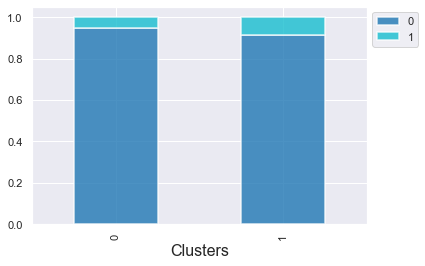

In [139]:
# visualizzazione grafica distribuzione class nei clusters (normalize = True)

bar_pl_1 = df_1C['class'].groupby(df_1Sc['hier.labels_']).value_counts(normalize=True).unstack(1)
bar_pl_1.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')
bar_pl_2 = df_1C['class'].groupby(df_1Sc['hier.labels_']).value_counts(normalize=True).unstack(1)

#plt.xticks(range(0, len(clust_name)), fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [124]:
#Crosstab hierarchical clusters vs class

pd.crosstab(hier.labels_, df["class"],normalize=True)

class,0,1
row_0,,
0,0.562064,0.030256
1,0.371994,0.035687


In [125]:
#Silhouette score for Hierarchical

print('Silhouette', silhouette_score(df_1, hier.labels_))

Silhouette 0.2652887058019716


In [126]:
df["kmeans clusters"]=df_1Sc["kmeans.labels_"]
df["dbscan clusters"]=df_1Sc["dbscan.labels_"]
df["hierarchical clusters"]=df_1Sc["hier.labels_"]
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,...,log_gdpuls,log_energy,genergy_S,gpuls_S,energy_S,gdenergy_S,gdpuls_S,kmeans clusters,dbscan clusters,hierarchical clusters
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,...,3.218876,0.000000,-0.344249,-1.651209,0.000000,-1.593212,-1.761844,1,0,0
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,...,2.890372,7.601402,-0.364671,-1.950436,0.963185,-1.498307,-2.209817,1,1,0
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,...,2.944439,0.000000,-0.765223,-2.026550,0.000000,-2.143552,-2.136087,1,0,0
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,...,4.919981,8.006701,0.081228,-0.636629,1.014541,-0.255009,0.557908,0,1,1
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,...,3.806662,0.000000,-0.465776,-1.513971,0.000000,-1.214037,-0.960295,1,0,0


In [127]:
pd.crosstab(df["kmeans clusters"], df["class"],normalize=True )

class,0,1
kmeans clusters,,
0,0.523662,0.030256
1,0.276959,0.009310
2,0.133437,0.026377


In [128]:
pd.crosstab(df["dbscan clusters"], df["class"],normalize=True)

class,0,1
dbscan clusters,,
-1,0.007758,0.000388
0,0.547711,0.015516
1,0.378588,0.050039


In [129]:
pd.crosstab(df["hierarchical clusters"], df["class"],normalize=True)

class,0,1
hierarchical clusters,,
0,0.562064,0.030256
1,0.371994,0.035687


In [130]:
#df[dbscan.labels_==1].median(axis=0)

In [131]:
#df[dbscan.labels_==0].median(axis=0)

In [132]:
#df[hier.labels_==1].median(axis=0)

In [133]:
#df[hier.labels_==0].median(axis=0)

In [134]:
# DBSCAN analisi valori mediani nei clusters

fig = go.Figure(data=[go.Table(
    header=dict(values=['Attribute','Cluster 0 - Median', 'Cluster 1 - Median'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['genergy', 'gdpuls', 'energy'], # 1st column
                       [16490.000000, -11.000000,0.000000], #2nd column
                       [44010.000000, 0.000000,3400.000000]
                      ], # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

In [135]:
# Hierarchical clustering analisi valori mediani nei clusters

fig = go.Figure(data=[go.Table(
    header=dict(values=['Attribute','Cluster 0 - Median', 'Cluster 1 - Median'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['genergy', 'gdpuls', 'energy'], # 1st column
                       [16320.000000, -29.000000,0.000000], #2nd column
                       [53390.000000, 38.000000,400.000000]
                      ], # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

In [136]:
# valori Silhouette per kmeans, hierarchical and DBSACN

print('Silhouette kmeans', silhouette_score(df_1, kmeans.labels_))
print('Silhouette DBSCAN ', silhouette_score(df_1, dbscan.labels_))
print('Silhouette hierarchical', silhouette_score(df_1, hier.labels_))


Silhouette kmeans 0.3278649056584835
Silhouette DBSCAN  0.25874449540850913
Silhouette hierarchical 0.2652887058019716


In [137]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Clustering technique', 'Silhoutte score', ['Davies - Bouldin score']],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['Kmeans', 'DBSCAN', 'Hierarchical'], # 1st column
                       [round(silhouette_score(df_1, kmeans.labels_),2),  round(silhouette_score(df_1, dbscan.labels_),2), round(silhouette_score(df_1, hier.labels_),2)], #2nd column
                       [round(davies_bouldin_score(df_1, kmeans.labels_),2),  round(davies_bouldin_score(df_1, dbscan.labels_),2), round(davies_bouldin_score(df_1, hier.labels_),2)]
                      ], # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

In [145]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Clustering technique', 'Silhoutte score'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['Kmeans', 'DBSCAN', 'Hierarchical'], # 1st column
                       [round(silhouette_score(df_1, kmeans.labels_),2),  round(silhouette_score(df_1, dbscan.labels_),2), round(silhouette_score(df_1, hier.labels_),2)], #2nd column
                      ], # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

In [138]:
hier_single = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier_single.fit(df_1)

hier_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hier_complete.fit(df_1)

hier_average = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
hier_average.fit(df_1)

hier_ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hier_ward.fit(df_1)

print('Silhouette Simple Link', silhouette_score(df_1, hier_single.labels_))
print('Silhouette Complete Link', silhouette_score(df_1, hier_complete.labels_))
print('Silhouette Group Average', silhouette_score(df_1, hier_average.labels_))
print('Silhouette Ward method', silhouette_score(df_1, hier_ward.labels_))



Silhouette Simple Link 0.713567701549317
Silhouette Complete Link 0.33625680787158213
Silhouette Group Average 0.6550585757060082
Silhouette Ward method 0.2652887058019716
